In [1]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

c:\Users\USER\ms-deep-learning\deep-learning\notebooks\deep-learning-basic\ch06
c:\Users\USER\ms-deep-learning\deep-learning\notebooks\deep-learning-basic


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from ch06.simple_convnet import SimpleConvNet
from common.trainer import Trainer

In [13]:
# 1. mnist 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸리면 데이터 줄이기
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

# 2. 모델 생성 및 학습
max_epochs = 10

network = SimpleConvNet(input_dim=(1, 28, 28),
                        conv_param={'filter_num':32, 'filter_size': 3, 'pad':0, 'stride':1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr':0.005},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

train loss:2.2905094813773914
=== epoch:1, train acc:0.187, test acc:0.175 ===
train loss:2.2748377958066914
train loss:2.227442990452461
train loss:2.1341048360156973
train loss:2.060989543334773
train loss:1.796586678556011
train loss:1.5898406292086265
train loss:1.4641014308185136
train loss:1.1624369632270115
train loss:0.9407888117534321
train loss:0.9481790022436979
train loss:1.0353339016387653
train loss:0.7200397554345596
train loss:0.9389764956672078
train loss:0.6209297731520831
train loss:0.618512483657205
train loss:0.620607202668238
train loss:0.5434843867655533
train loss:0.5182169756590873
train loss:0.48621685569411893
train loss:0.5454047534342523
train loss:0.5277127177307702
train loss:0.49652655463782636
train loss:0.47132977147191923
train loss:0.5180143184130428
train loss:0.5170736624339953
train loss:0.6084310004290433
train loss:0.6855880909359887
train loss:0.5272145389137847
train loss:0.4292093483409043
train loss:0.4588550867154854
train loss:0.5216390426

Saved Network parameters


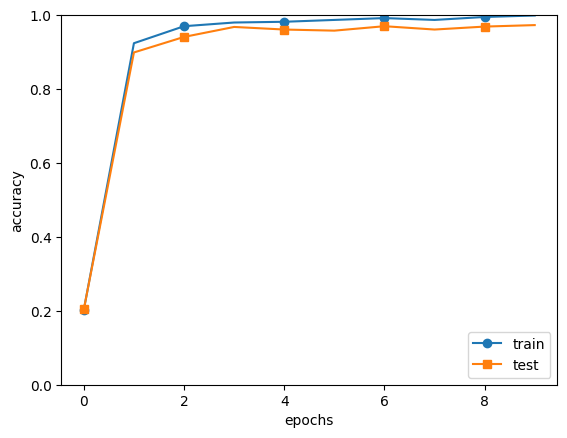

In [8]:
# 매개 변수 보존 
network.save_params("params.pkl")
print("Saved Network parameters")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()